In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import folium
import plotly.express as px
import seaborn as sns
import squarify

%matplotlib inline

In [32]:
base_path = './Data/'
# Const_sta = pd.read_csv(base_path+'ConstructorStandings.csv')
# Dri_sta = pd.read_csv(base_path+'DriverStandings.csv')
# races = pd.read_csv(base_path+'Races.csv')
# results = pd.read_csv(base_path+'Results.csv')
# Wea_info = pd.read_csv(base_path+'WeatherInfo.csv')
# Qua_results = pd.read_csv(base_path+'QualifyingResults.csv')

Const_sta = pd.read_csv(base_path+'ConstructorStandings2014.csv')
Dri_sta = pd.read_csv(base_path+'DriverStandings2014.csv')
races = pd.read_csv(base_path+'Races2014.csv')
results = pd.read_csv(base_path+'Results2014.csv')
Wea_info = pd.read_csv(base_path+'WeatherInfo2014.csv')
Qua_results = pd.read_csv(base_path+'QualifyingResults2014.csv')

Task 1: frequency of race in a circuit by year(1950-2019)

In [33]:
races.drop(columns=['Unnamed: 0'],inplace=True)

In [34]:
races.head()

,Unnamed: 0.1,season,round,circuit_id,lat,long,country,date,url
0,0,2014,1,albert_park,-37.84970,144.96800,Australia,2014-03-16,http://en.wikipedia.org/wiki/2014_Australian_G...
1,1,2014,2,sepang,2.76083,101.73800,Malaysia,2014-03-30,http://en.wikipedia.org/wiki/2014_Malaysian_Gr...
2,2,2014,3,bahrain,26.03250,50.51060,Bahrain,2014-04-06,http://en.wikipedia.org/wiki/2014_Bahrain_Gran...
3,3,2014,4,shanghai,31.33890,121.22000,China,2014-04-20,http://en.wikipedia.org/wiki/2014_Chinese_Gran...
4,4,2014,5,catalunya,41.57000,2.26111,Spain,2014-05-11,http://en.wikipedia.org/wiki/2014_Spanish_Gran...


In [35]:
race_by_year = races.groupby('season')['circuit_id'].value_counts()

In [36]:
year_l = []
circuit_l = []
count_l = []

for year,circuit in race_by_year.index:
  year_l.append(year)
  circuit_l.append(circuit)
  count_l.append(race_by_year.loc[(year,circuit)])

In [37]:
race_tot = races.groupby('circuit_id')['circuit_id'].count()

In [38]:
race_tot

circuit_id
albert_park        7
americas           8
bahrain           10
baku               6
catalunya          9
hockenheimring     4
hungaroring        9
imola              3
interlagos         8
istanbul           2
jeddah             2
losail             1
marina_bay         7
miami              1
monaco             8
monza              9
mugello            1
nurburgring        1
portimao           2
red_bull_ring     11
ricard             4
rodriguez          7
sepang             4
shanghai           6
silverstone       10
sochi              8
spa                9
suzuka             7
villeneuve         7
yas_marina         9
zandvoort          2
Name: circuit_id, dtype: int64

In [39]:
circuits_uni = [circuit for circuit in race_tot.index]

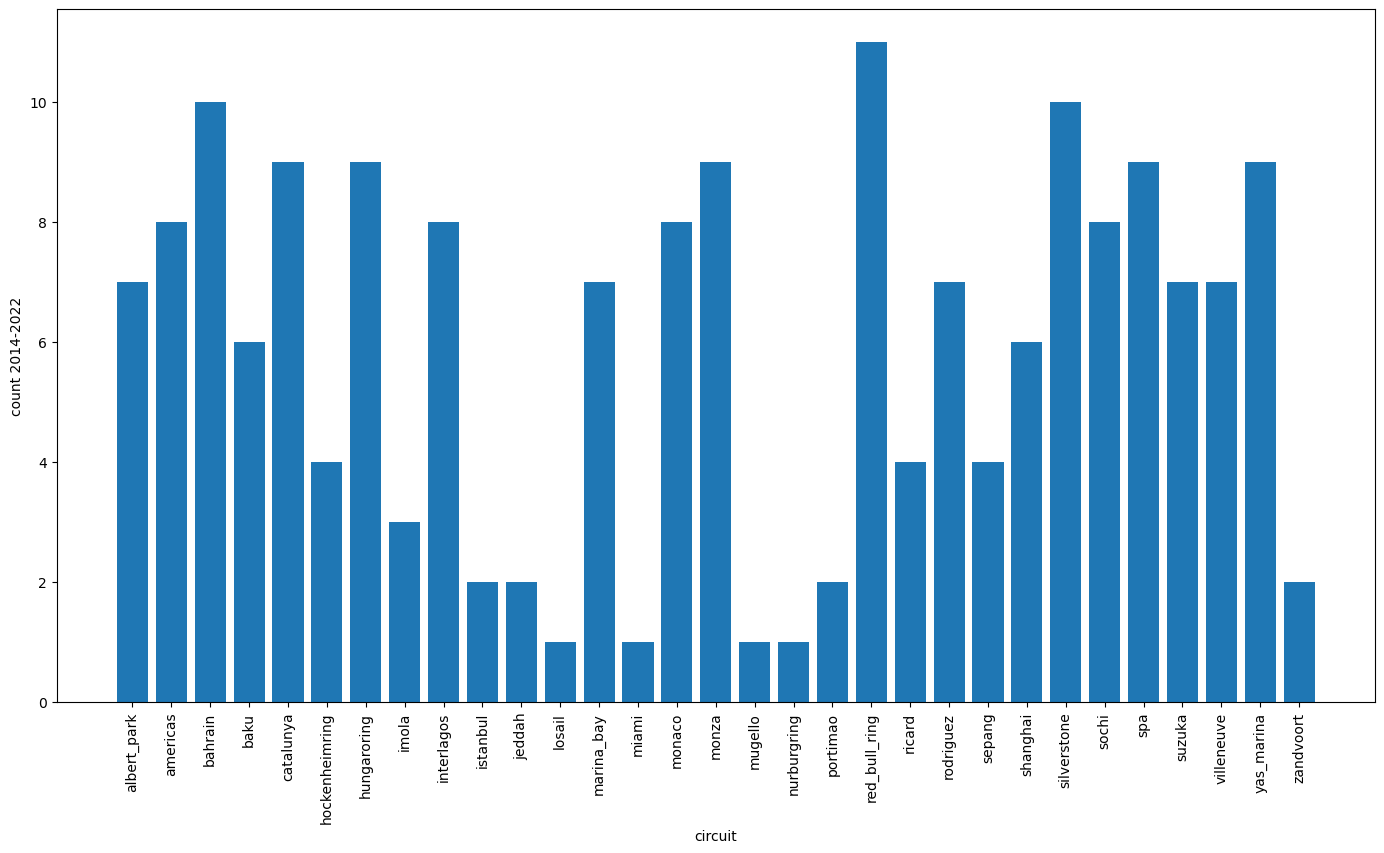

In [40]:
plt.subplots(figsize=(17,9))
plt.bar(circuits_uni,race_tot,width=0.8)
plt.xticks(circuits_uni,rotation='vertical',size=10)
plt.xlabel('circuit')
plt.ylabel('count 2014-2022')
plt.show()

In [11]:
circuit_num = {}
a = races['circuit_id'].unique()
for i in range(len(a)):
  circuit_num[a[i]] = i

In [12]:
circuit_id_l = [circuit_num[i] for i in circuit_l]

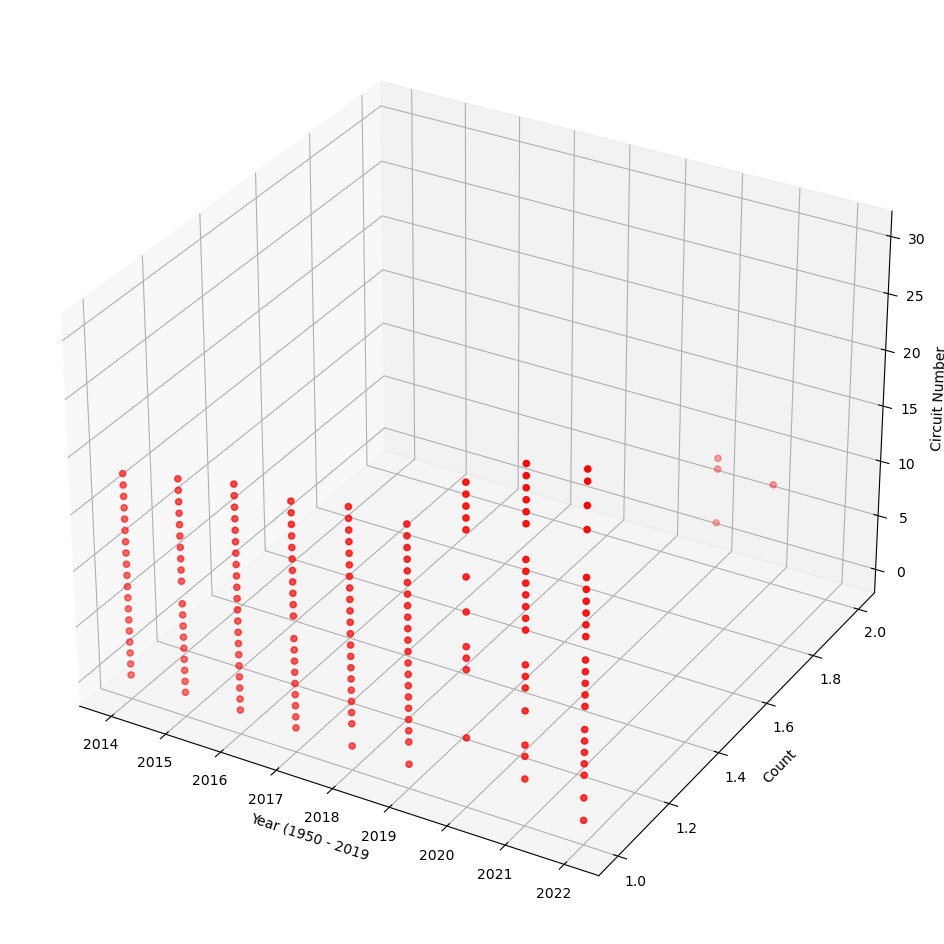

In [13]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111,projection='3d')
frequency_graph = ax.scatter(year_l,count_l,circuit_id_l,c='r',marker='o')
#frequency_graph.set_label(circuit_num)
ax.set_xlabel("Year (1950 - 2019")
ax.set_ylabel("Count")
ax.set_zlabel("Circuit Number")
#ax.legend()
plt.show()

In [14]:
geometry = gpd.points_from_xy(races.long, races.lat)
geo_races = gpd.GeoDataFrame(races[['season','round','circuit_id', 'lat', 'long', 'country', 'date', 'url']], geometry=geometry)

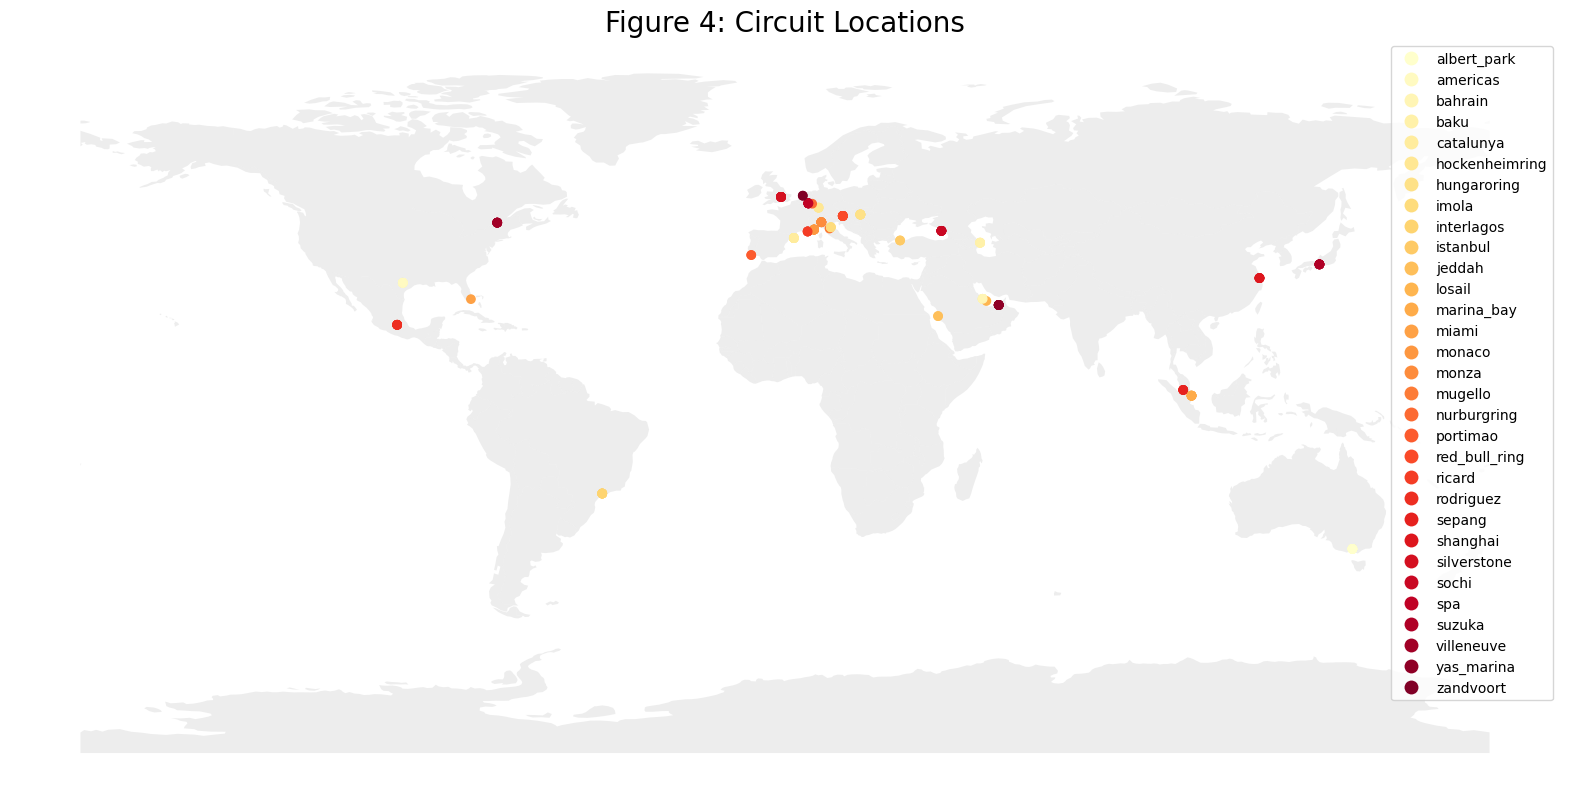

In [115]:
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# fig, ax = plt.subplots(figsize=(24,18))
# world.plot(ax=ax, alpha=0.4, color='grey')
# geo_races.plot(column='circuit_id', ax=ax, legend=True)
# plt.title('Circuit locations')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(20, 12))

world.plot(ax=ax, alpha=0.4, color='lightgrey')

geo_races.plot(column='circuit_id', ax=ax, cmap='YlOrRd', legend=True)

ax.set_title('Figure 4: Circuit Locations', fontsize=20)

plt.axis("off")

plt.show()

In [107]:
# map = folium.Map(location = [4,10], tiles = "Stamen Terrain", zoom_start = 3)
# geo_races_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_races.geometry ]
# i = 0
# for coordinates in geo_races_list:
#   map.add_child(folium.Marker(location = coordinates, popup = "Circuit: " + str(geo_races.circuit_id[i]) + '<br>', icon = folium.Icon(color = "%s")))
#   i=i+1

# map

Task 2:coorelation between grid and podium

In [17]:
dri_results = results[['circuit_id','driver','grid','podium']]

In [18]:
dri_results.head()

,circuit_id,driver,grid,podium
0,albert_park,rosberg,3,1
1,albert_park,kevin_magnussen,4,2
2,albert_park,button,10,3
3,albert_park,alonso,5,4
4,albert_park,bottas,15,5


In [105]:
b = dri_results.groupby('circuit_id')[['grid','podium']].corr()['podium']
filt = (b != 1)
b = b.loc[filt]

In [20]:
circuit_t2 = []
corr_values = []
for circuit,grid in b.index:
  circuit_t2.append(circuit)
  corr_values.append(b.loc[circuit,grid])

C:\Users\savan\AppData\Local\Temp\ipykernel_27992\3101346470.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(circuit_t2, rotation='vertical', fontsize=12)


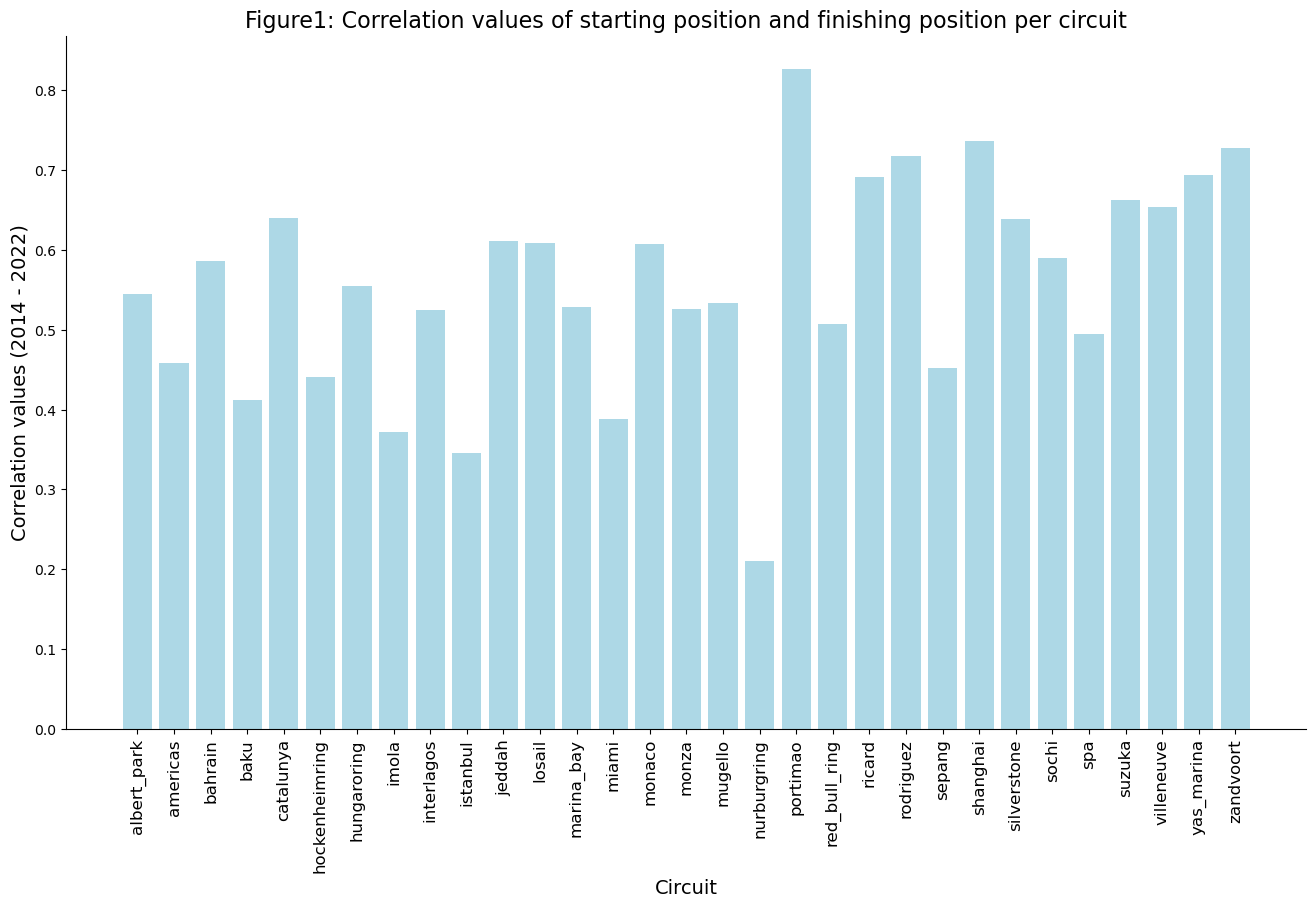

In [113]:
# plt.subplots(figsize=(20,12))
# plt.bar(circuit_t2,corr_values,width=0.8)
# plt.xticks(circuit_t2,rotation='vertical',size=10)
# plt.xlabel('circuit')
# plt.ylabel('correlation values(1950-2019)')
# plt.show()

fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(circuit_t2, corr_values, width=0.8, color='lightblue')
ax.set_xticklabels(circuit_t2, rotation='vertical', fontsize=12)
ax.set_xlabel('Circuit', fontsize=14)
ax.set_ylabel('Correlation values (2014 - 2022)', fontsize=14)
ax.set_title('Figure1: Correlation values of starting position and finishing position per circuit', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


Task 3: car failures

In [69]:
results.head()
# filt = results['season'] > 201 #getting data after year
result_fil = results

In [83]:
car_failures = ['ERS', 'Oil pressure', 'Engine', 'Technical', 'Gearbox', 'Electrical', 'Power Unit', 
                'Brakes', 'Clutch', 'Retired', 'Exhaust', 'Mechanical', 'Turbo', 'Rear wing', 'Drivetrain', 
                'Suspension', 'Oil leak', 'Water leak', 'Water pressure', 'Electronics', 'Wheel', 'Power loss',
                'Fuel system', 'Transmission', 'Front wing', 'Tyre', 'Throttle', 'Brake duct', 'Hydraulics',
                'Battery', 'Puncture', 'Overheating', 'Wheel nut', 'Vibrations', 'Driveshaft', 'Fuel pressure',
                'Seat', 'Spark plugs', 'Steering', 'Damage', 'Out of fuel', 'Debris', 'Radiator', 
                'Cooling system', 'Water pump', 'Fuel leak', 'Fuel pump', 'Undertray', 'Differential'] # defining basis of car failure 
races_per_constructor = result_fil.groupby('constructor')['status'].count() #grouping on the basis of constructor and counting number of races per constructor

In [71]:
failure_filt = result_fil['status'].isin(car_failures) #defining a filter for filtering our data frame to df having only failures
failure_filtered = result_fil.loc[failure_filt] #executing the filter and storing df in a variable
failures_per_contructor = failure_filtered.groupby('constructor')['status'].count() #grouping on the basis of constructor and counting number of failures per constructor 
uncommon_constructors = [] #defining a list to drop the uncommon constructors, because those companies never made a mistake
for i in races_per_constructor.index: #loop to find uncommon constructors
  if i not in failures_per_contructor.index:
    uncommon_constructors.append(i)

In [72]:
zeros = [0 for i in uncommon_constructors]
no_fail = pd.Series(zeros,index=uncommon_constructors)
failures_per_contructor = failures_per_contructor.append(no_fail)
failures_per_contructor.sort_index(inplace=True)
races_per_constructor.sort_index(inplace=True)

C:\Users\savan\AppData\Local\Temp\ipykernel_27992\3071581332.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  no_fail = pd.Series(zeros,index=uncommon_constructors)
C:\Users\savan\AppData\Local\Temp\ipykernel_27992\3071581332.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  failures_per_contructor = failures_per_contructor.append(no_fail)


In [73]:
df = pd.DataFrame({'unsuccessful': failures_per_contructor,'total races':races_per_constructor}) #combining a and c into a df
df['percentage failure'] = (df['unsuccessful'] / df['total races'])*100  #defining a new column for percentage

In [74]:
df.head()

,unsuccessful,total races,percentage failure
alfa,12,164,7.317073
alphatauri,14,122,11.475410
alpine,11,88,12.500000
aston_martin,5,88,5.681818
caterham,11,34,32.352941


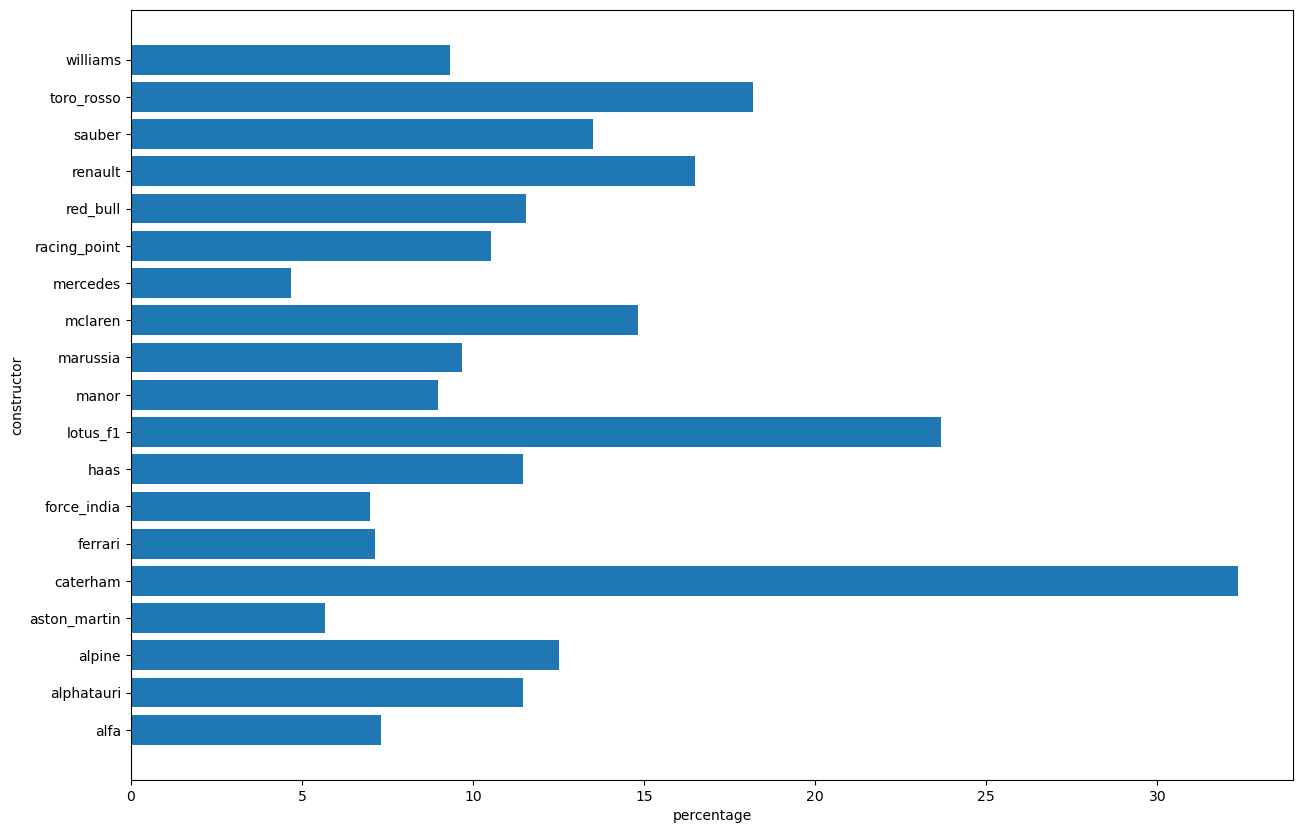

In [75]:
plt.subplots(figsize=(15,10))
plt.barh(df.index,df['percentage failure'])
plt.yticks(df.index,size=10)
plt.xlabel('percentage')
plt.ylabel('constructor')
plt.show()

In [84]:
teamsDict = {'mercedes': ['mercedes'],
             'ferrari': ['ferrari'],
             'mclaren': ['mclaren'],
             'red_bull': ['red_bull'],
             'williams': ['williams'],
             'haas': ['haas'],
             'aston_martin': ['aston_martin', 'force_india', 'racing_point'],
             'alpine': ['alpine', 'renault', 'lotus_f1'],
             'alphatauri': ['alphatauri', 'toro_rosso'], 
             'alfa': ['alfa', 'sauber'],
             'manor': ['manor', 'marussia']
            }

for key, value in teamsDict.items():
        result_fil['constructor'] = result_fil['constructor'].replace(value, key)

In [85]:
races_per_constructor = result_fil.groupby('constructor')['status'].count()

In [86]:
zeros = [0 for i in uncommon_constructors]
no_fail = pd.Series(zeros,index=uncommon_constructors)
failures_per_contructor = failures_per_contructor.append(no_fail)
failures_per_contructor.sort_index(inplace=True)
races_per_constructor.sort_index(inplace=True)

C:\Users\savan\AppData\Local\Temp\ipykernel_27992\3071581332.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  failures_per_contructor = failures_per_contructor.append(no_fail)


In [87]:
failure_filt = result_fil['status'].isin(car_failures) #defining a filter for filtering our data frame to df having only failures
failure_filtered = result_fil.loc[failure_filt] #executing the filter and storing df in a variable
failures_per_contructor = failure_filtered.groupby('constructor')['status'].count() #grouping on the basis of constructor and counting number of failures per constructor 
uncommon_constructors = [] #defining a list to drop the uncommon constructors, because those companies never made a mistake
for i in races_per_constructor.index: #loop to find uncommon constructors
  if i not in failures_per_contructor.index:
    uncommon_constructors.append(i)

In [88]:
df = pd.DataFrame({'unsuccessful': failures_per_contructor,'total races':races_per_constructor}) #combining a and c into a df
df['percentage failure'] = (df['unsuccessful'] / df['total races'])*100  #defining a new column for percentage

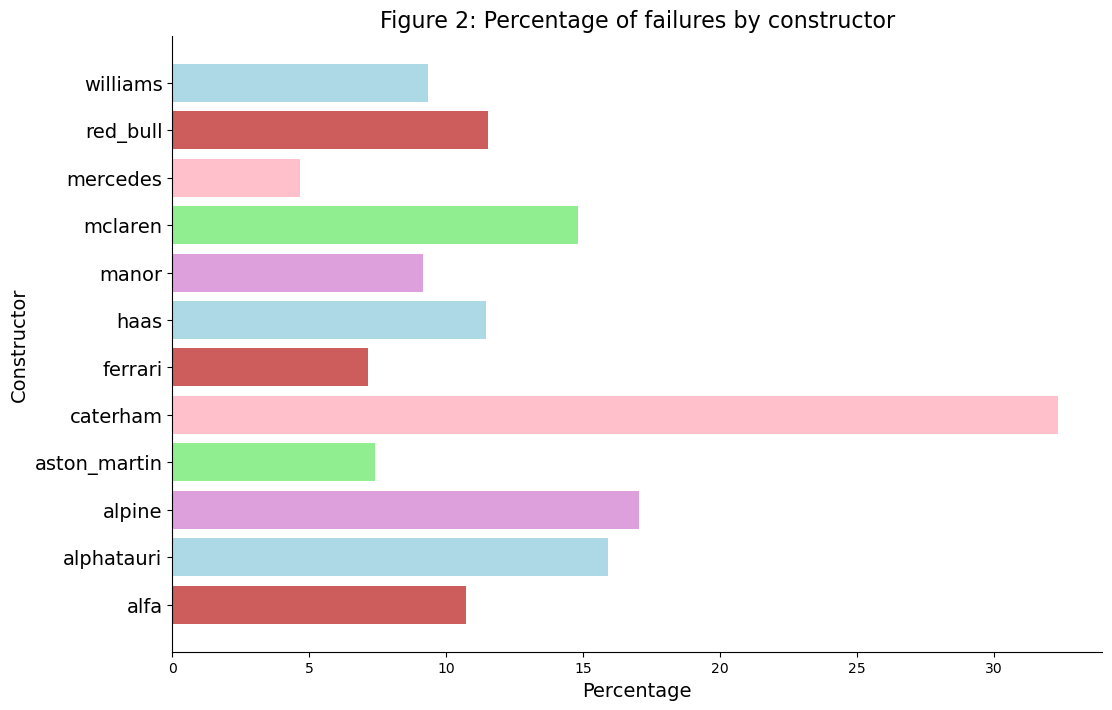

In [112]:
# plt.subplots(figsize=(15,10))
# plt.barh(df.index,df['percentage failure'])
# plt.yticks(df.index,size=10)
# plt.xlabel('percentage')
# plt.ylabel('constructor')
# plt.show()
colors = ['indianred', 'lightblue', 'plum', 'lightgreen', 'pink']


fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(df.index, df['percentage failure'], color=colors)
ax.set_yticks(df.index)
ax.set_yticklabels(df.index, fontsize=14)
ax.set_xlabel('Percentage', fontsize=14)
ax.set_ylabel('Constructor', fontsize=14)
ax.set_title('Figure 2: Percentage of failures by constructor', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.show()


In [48]:
circuit_incidents = ['Collision', 'Disqualified','Withdrew', 'Accident', 'Collision damage', 'Spun off', 'Excluded']
incidents_filt = result_fil['status'].isin(circuit_incidents)
incidents_filtered = result_fil.loc[incidents_filt]
incidents_per_contructor = incidents_filtered.groupby('circuit_id')['status'].count()
incidents_circuits = [i for i in incidents_per_contructor.index]
incidents_per_contructor.to_csv()
print(incidents_per_contructor)
#result_fil.groupby('circuit_id')['status'].unique()
#result_fil['status'].unique()

circuit_id
albert_park       11
americas          14
bahrain           10
baku              11
catalunya         11
hockenheimring     7
hungaroring       12
imola              6
interlagos        15
istanbul           3
jeddah             8
marina_bay        16
miami              2
monaco            19
monza              9
mugello            6
nurburgring        1
portimao           2
red_bull_ring     11
ricard             5
rodriguez          7
sepang             3
shanghai           5
silverstone       23
sochi             14
spa               12
suzuka             8
villeneuve        10
yas_marina         5
Name: status, dtype: int64


<AxesSubplot: >

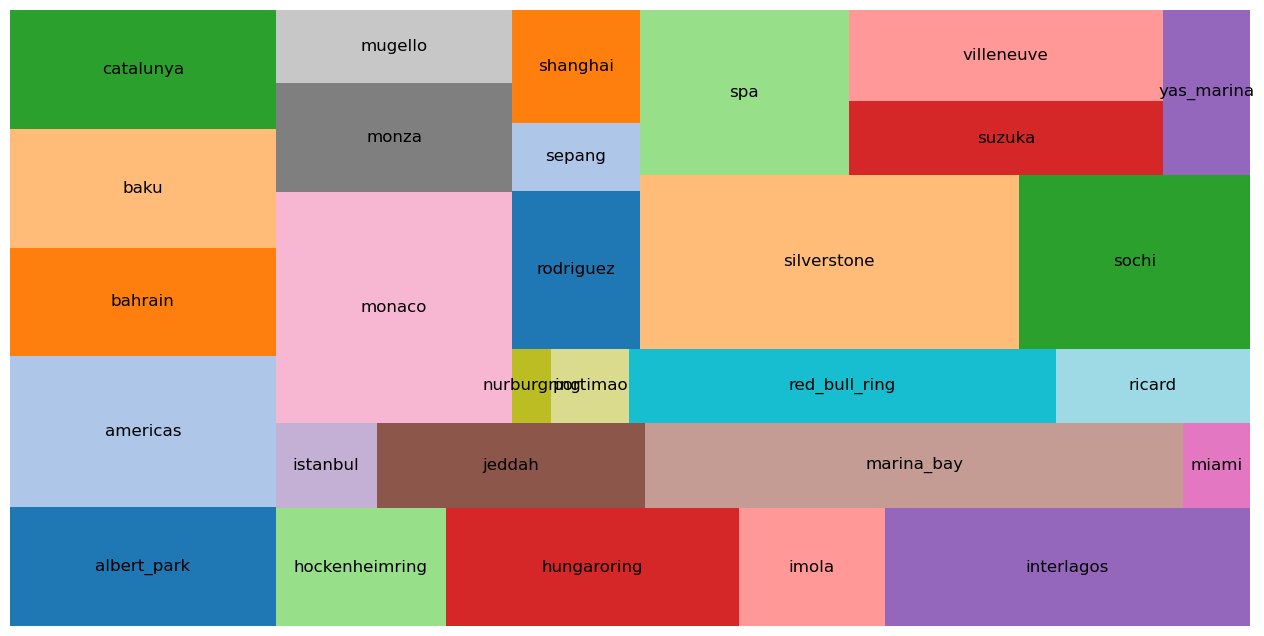

In [114]:
plt.figure(figsize=(16, 8))

plt.axis("off")
# plt.set_title('Incidents per circuit', fontsize=16)
squarify.plot(sizes=incidents_per_contructor,label= incidents_circuits, alpha=1, color=sns.color_palette("tab20", len(
                         incidents_per_contructor)), pad=0, text_kwargs={'fontsize': 12})

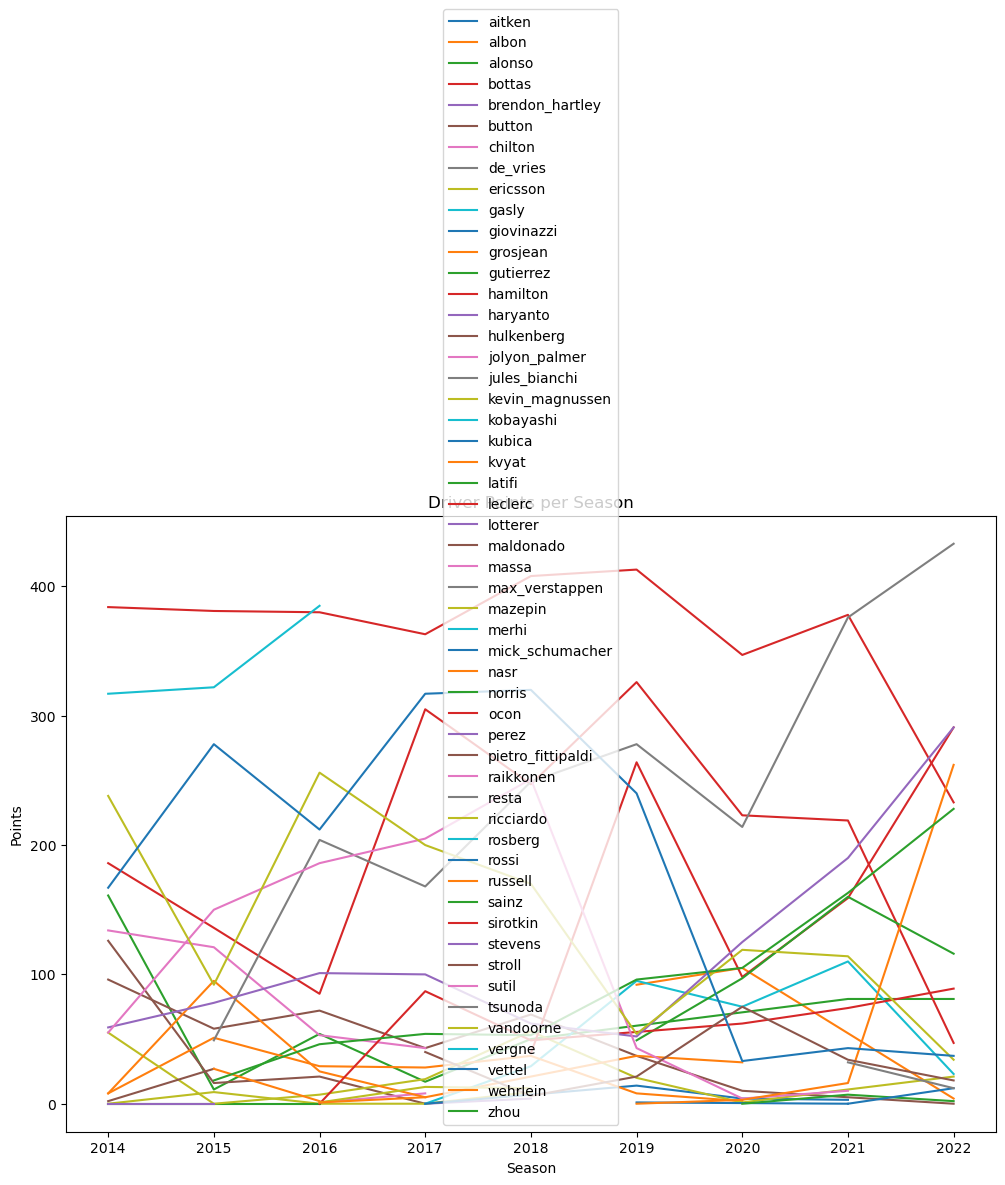

In [111]:
driver_points = results.groupby(['driver', 'season'])['points'].sum().reset_index()

# Get a list of unique drivers in the dataset
drivers = driver_points['driver'].unique()

# Create a line graph for each driver
fig, ax = plt.subplots(figsize=(12,8))

for driver in drivers:
    # Get the points and seasons for the current driver
    points = driver_points[driver_points['driver'] == driver]['points']
    seasons = driver_points[driver_points['driver'] == driver]['season']
    
    # Plot the line graph for the driver
    ax.plot(seasons, points, label=driver)

# Set the x-axis and y-axis labels
ax.set_xlabel('Season')
ax.set_ylabel('Points')

# Set the plot title
ax.set_title('Driver Points per Season')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()


# results['Driver'] = results['driver'].apply(lambda s : s[-3:]).map(str.upper)
# results.sort_values(by='belgium',ascending=False, inplace=True)
# results.set_index('Driver', inplace=True)
# results.drop('Car', axis=1,  inplace=True)

# fig = plt.figure(figsize=(14,8))
# sns.set(style='whitegrid')

# ax = results.transpose().rolling(3).sum().plot(figsize=(14,8),use_index=False, xlim=(2,15)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
# plt.xlabel("Races")
# plt.ylabel("Points")

# plt.show()

# # season_results_df['Driver'] = season_results_df['Driver'].apply(lambda s : s[-3:]).map(str.upper)
# # season_results_df.sort_values(by='belgium',ascending=False, inplace=True)
# # season_results_df.set_index('Driver', inplace=True)
# # season_results_df.drop('Car', axis=1,  inplace=True)

# # fig = plt.figure(figsize=(14,8))
# # sns.set(style='whitegrid')

# # ax = season_results_df.transpose().rolling(3).sum().plot(figsize=(14,8),use_index=False, xlim=(2,15)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
# # plt.xlabel("Races")
# # plt.ylabel("Points")

# # plt.savefig(f"{path}/roll1990.png", dpi=300)